In [389]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
import seaborn as sns
#import plotly as pl
import datetime as dt
import re
sns.set_style('darkgrid')
%matplotlib inline
py.style.use('ggplot')
np.random.seed(42)

In [390]:
df=pd.read_json('logins.json', orient='columns')
#df.resample("15T").mean()
#pd.to_datetime(df)
df['num']=1
#df['day']=df['login_time'].dt.dayofweek
df=df.set_index('login_time')
df.head()
df2=df.resample("15T").count()

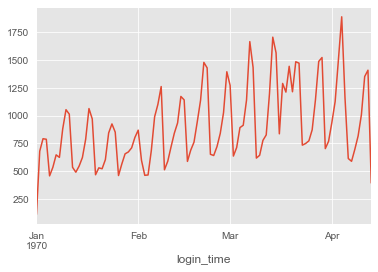

In [391]:
df3=df.resample("1D").count()['num']
df3.plot()


In [392]:
dfn=pd.read_json('logins.json', orient='columns')
dfn['day']=dfn['login_time'].dt.day_name()
dfn['month']=dfn['login_time'].dt.month_name()

In [393]:
dfn['num']=1
dfn2=dfn.set_index('login_time')

In [394]:
dfn2.groupby(['month','day']).count()

num
month    day            
April    Friday     2513
         Monday     1010
         Saturday   3241
         Sunday     2571
         Thursday   1945
         Tuesday     590
         Wednesday  1637
February Friday     4092
         Monday     2355
         Saturday   5149
         Sunday     4704
         Thursday   3317
         Tuesday    2386
         Wednesday  2670
January  Friday     3907
         Monday     1926
         Saturday   4642
         Sunday     3625
         Thursday   2640
         Tuesday    2124
         Wednesday  2375
March    Friday     4696
         Monday     3532
         Saturday   6345
         Sunday     7267
         Thursday   4058
         Tuesday    4168
         Wednesday  3657

In [395]:
dfn2.groupby(['month','day']).count()

num
month    day            
April    Friday     2513
         Monday     1010
         Saturday   3241
         Sunday     2571
         Thursday   1945
         Tuesday     590
         Wednesday  1637
February Friday     4092
         Monday     2355
         Saturday   5149
         Sunday     4704
         Thursday   3317
         Tuesday    2386
         Wednesday  2670
January  Friday     3907
         Monday     1926
         Saturday   4642
         Sunday     3625
         Thursday   2640
         Tuesday    2124
         Wednesday  2375
March    Friday     4696
         Monday     3532
         Saturday   6345
         Sunday     7267
         Thursday   4058
         Tuesday    4168
         Wednesday  3657

In [396]:

df4['login_time']=df4.index

In [397]:
## df2['1970-02-02']['num'].plot()
#dfmon=dfn2[dfn2['day']=='Monday'].resample("15T").count()
df4=dfn
df4=df4.set_index('login_time')
df4=df4.resample("15T").count()
df4['login_time']=df4.index
df4['day']=df4['login_time'].dt.day_name()
df4['month']=df4['login_time'].dt.month_name()
df4['week']=df4['login_time'].dt.week
df4mon=df4[df4['day']=='Monday']


In [398]:
dfm=df4.resample('1D').sum()
dfm['date']=dfm.index
dfm['month']=dfm['date'].dt.month_name()
dfm['day']=dfm['date'].dt.day_name()
dfm

,num,week,date,month,day
login_time,,,,,
1970-01-01,112,16,1970-01-01,January,Thursday
1970-01-02,681,96,1970-01-02,January,Friday
1970-01-03,793,96,1970-01-03,January,Saturday
1970-01-04,788,96,1970-01-04,January,Sunday
1970-01-05,459,192,1970-01-05,January,Monday
1970-01-06,536,192,1970-01-06,January,Tuesday
1970-01-07,648,192,1970-01-07,January,Wednesday
1970-01-08,625,192,1970-01-08,January,Thursday
1970-01-09,881,192,1970-01-09,January,Friday


In [399]:
labs=dfm[dfm['month']=='January']['day'].values
labs

array(['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

<Figure size 432x288 with 0 Axes>

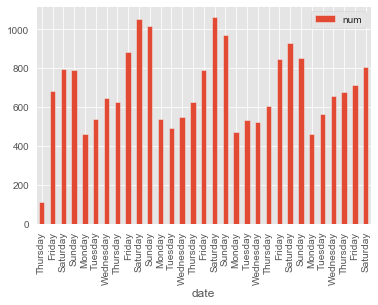

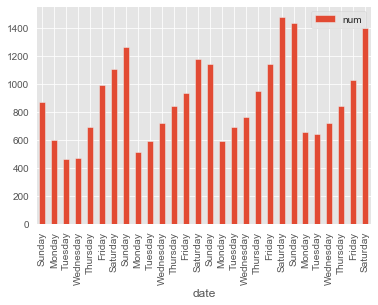

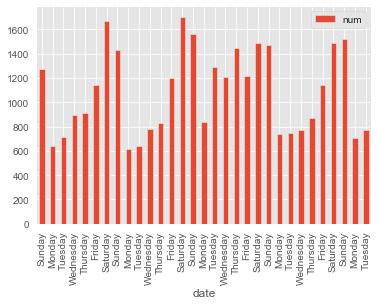

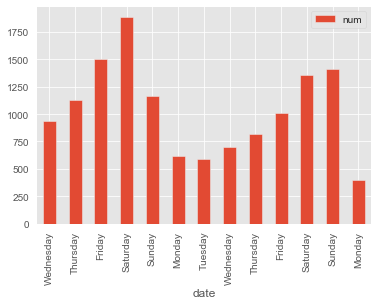

In [400]:
months=dfm['month'].unique()

fig = py.figure()

for i in months:
    ax=dfm[dfm['month']==i].plot(kind='bar',y='num',x='date')
    ax.set_xticklabels(dfm[dfm['month']==i]['day'])

In [401]:
df4mon

,day,month,num,login_time,week
login_time,,,,,
1970-01-05 00:00:00,Monday,January,8,1970-01-05 00:00:00,2
1970-01-05 00:15:00,Monday,January,3,1970-01-05 00:15:00,2
1970-01-05 00:30:00,Monday,January,7,1970-01-05 00:30:00,2
1970-01-05 00:45:00,Monday,January,4,1970-01-05 00:45:00,2
1970-01-05 01:00:00,Monday,January,7,1970-01-05 01:00:00,2
1970-01-05 01:15:00,Monday,January,5,1970-01-05 01:15:00,2
1970-01-05 01:30:00,Monday,January,7,1970-01-05 01:30:00,2
1970-01-05 01:45:00,Monday,January,5,1970-01-05 01:45:00,2
1970-01-05 02:00:00,Monday,January,5,1970-01-05 02:00:00,2


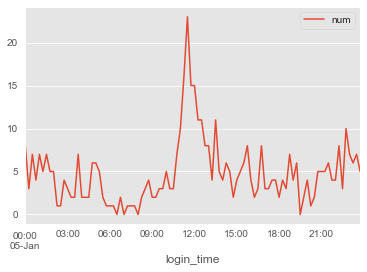

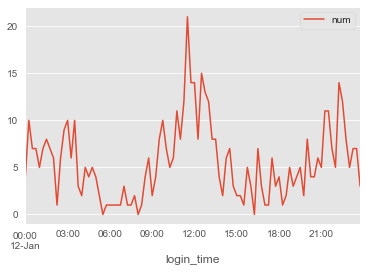

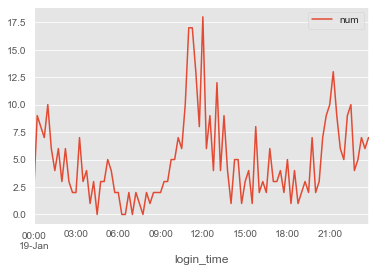

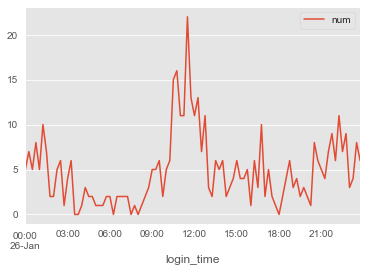

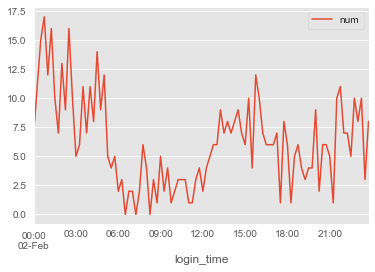

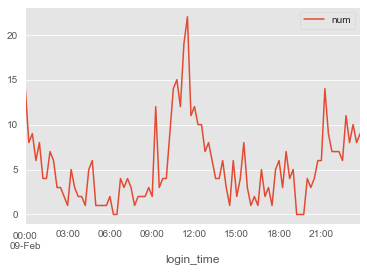

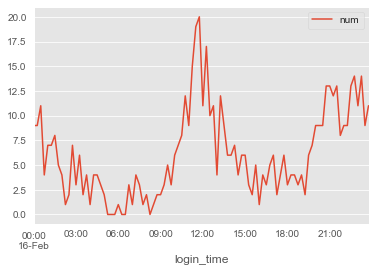

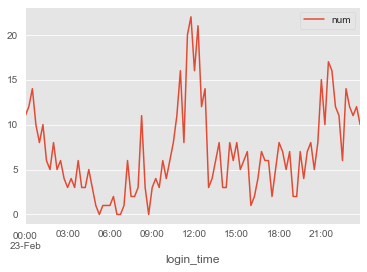

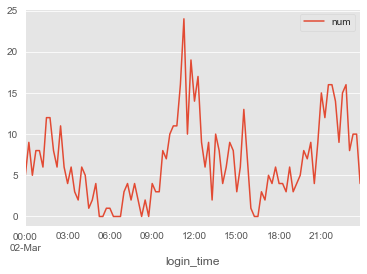

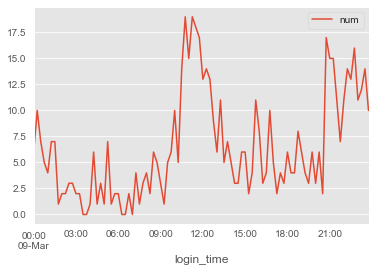

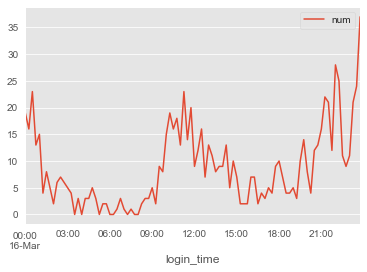

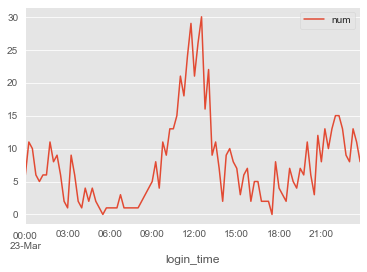

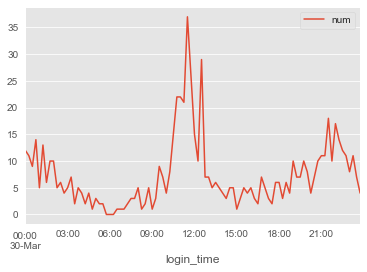

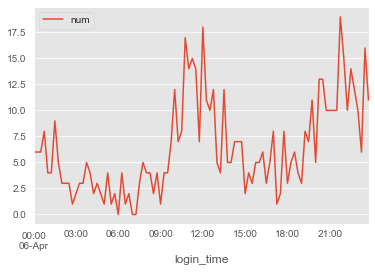

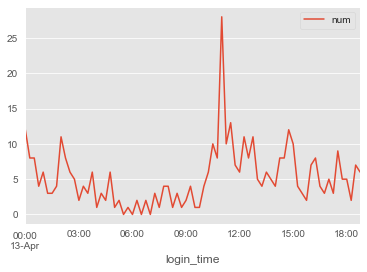

In [402]:
df4mon=df4[df4['day']=='Monday']
weeks=df4mon['week'].unique()
for i in weeks:
    ax=df4mon[df4mon['week']==i].plot(y='num',x='login_time')


In [403]:
df4tue=df4[df4['day']=='Tuesday']
df4wed=df4[df4['day']=='Wednesday']
df4thu=df4[df4['day']=='Thursday']
df4fri=df4[df4['day']=='Friday']
df4sat=df4[df4['day']=='Saturday']
df4sun=df4[df4['day']=='Sunday']

<Figure size 432x288 with 0 Axes>

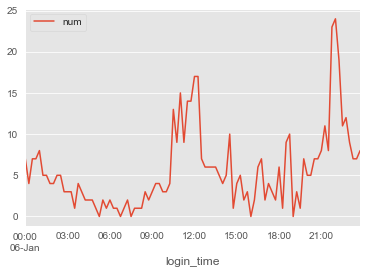

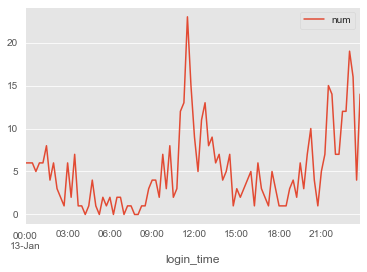

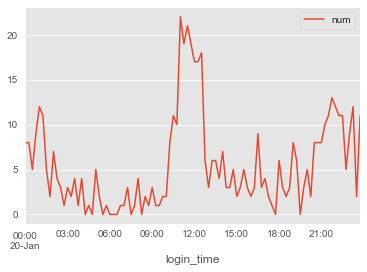

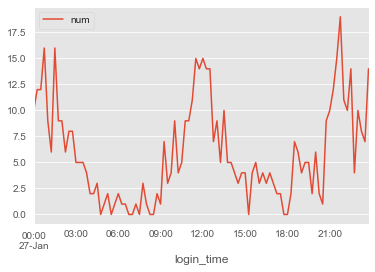

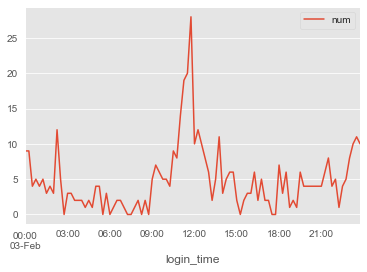

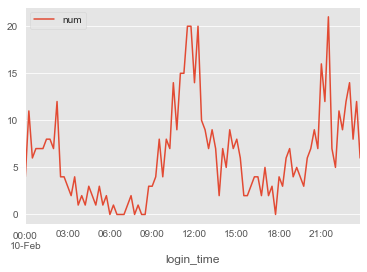

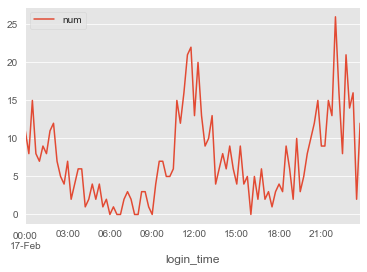

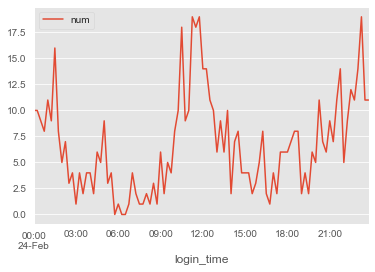

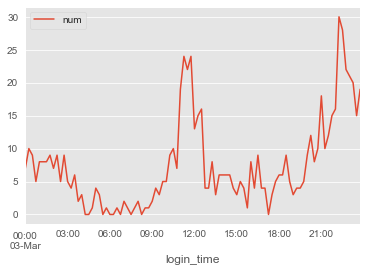

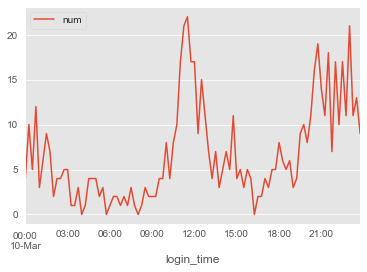

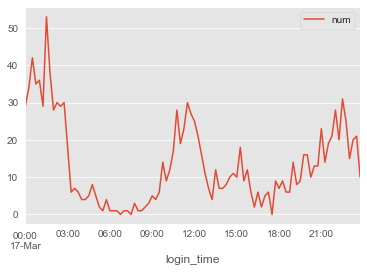

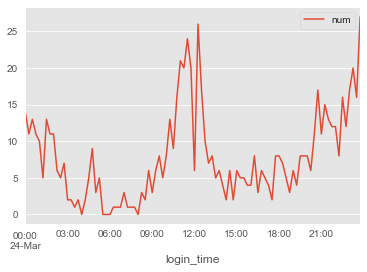

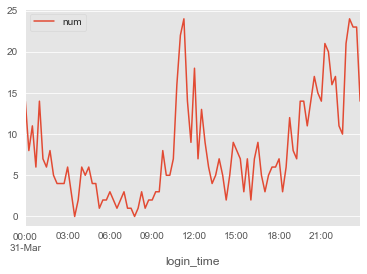

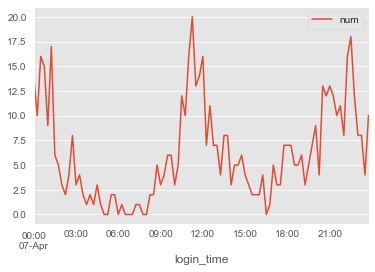

In [404]:
weeks=df4tue['week'].unique()
fig = py.figure()
num1=1
for i in weeks:
    ax=df4tue[df4tue['week']==i].plot(y='num',x='login_time')

<Figure size 432x288 with 0 Axes>

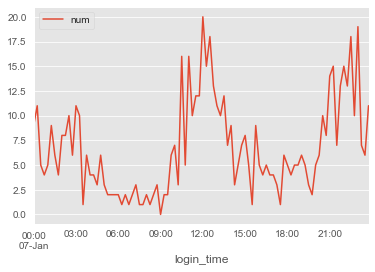

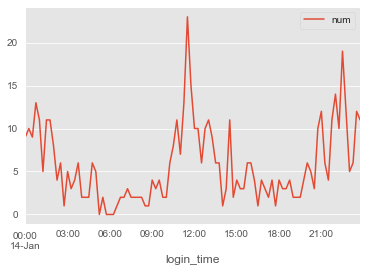

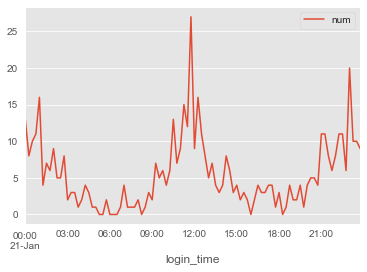

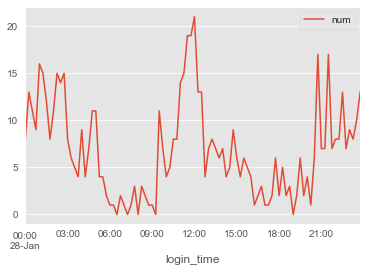

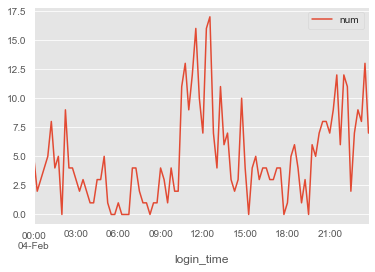

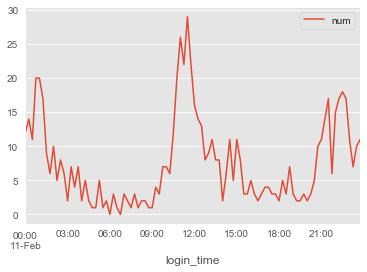

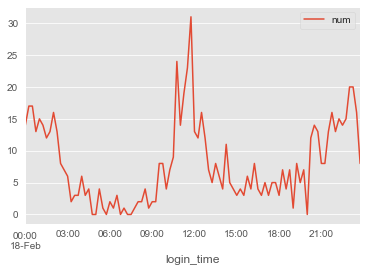

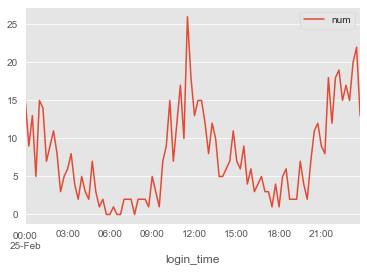

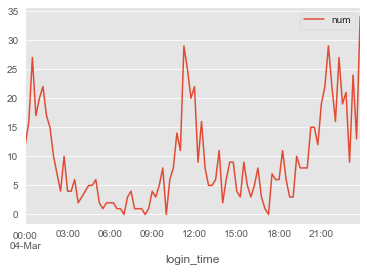

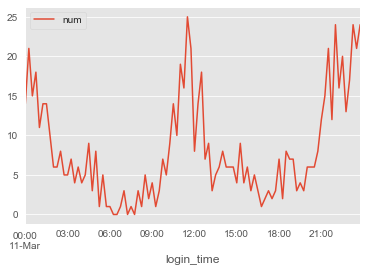

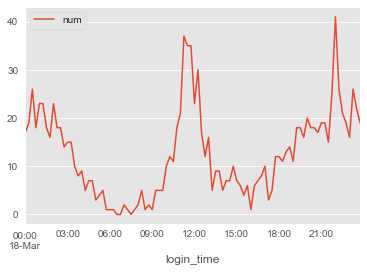

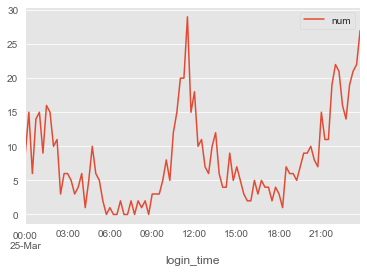

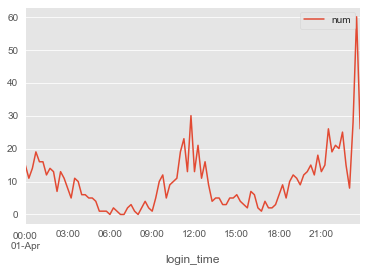

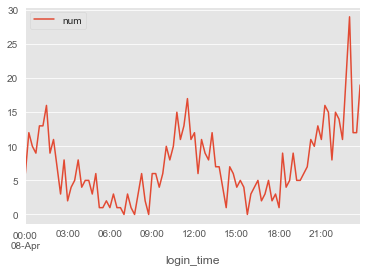

In [405]:
weeks=df4wed['week'].unique()
fig = py.figure()
num1=1
for i in weeks:
    ax=df4wed[df4wed['week']==i].plot(y='num',x='login_time')

<Figure size 432x288 with 0 Axes>

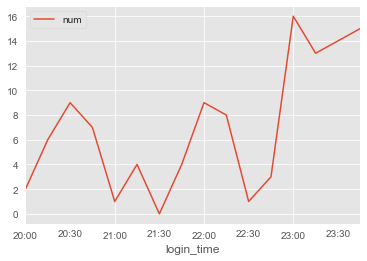

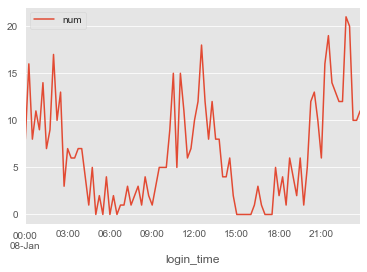

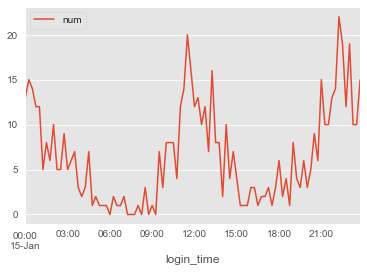

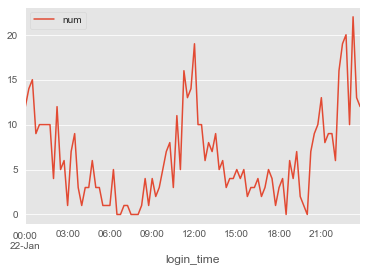

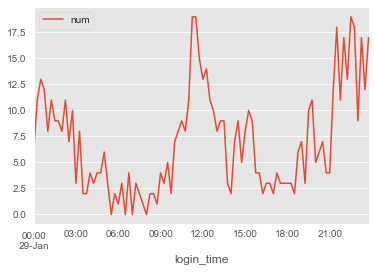

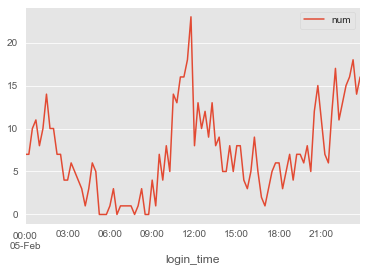

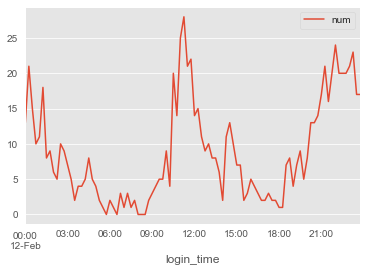

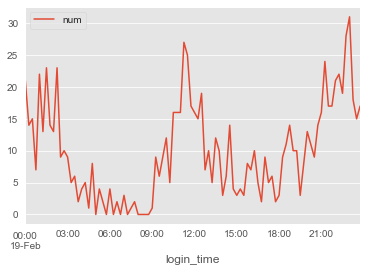

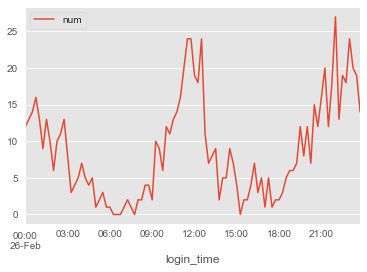

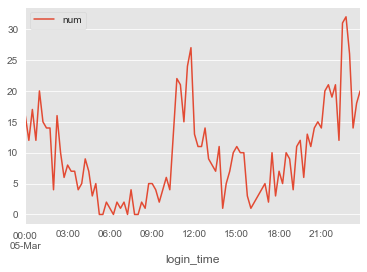

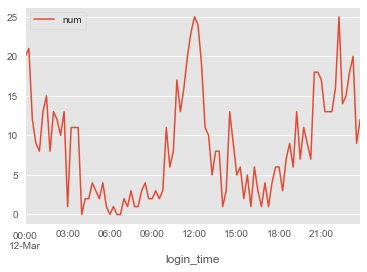

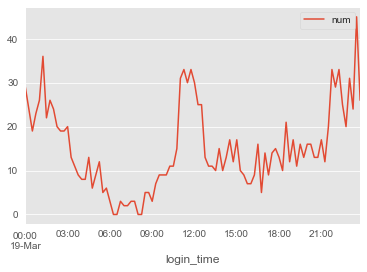

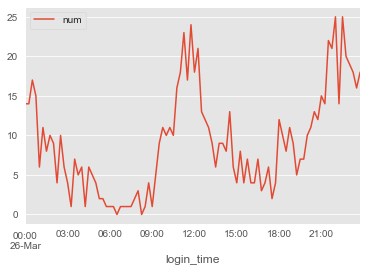

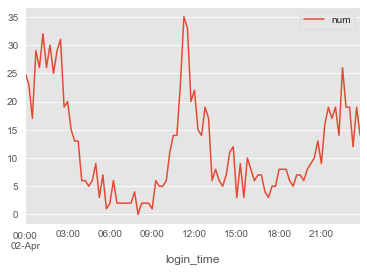

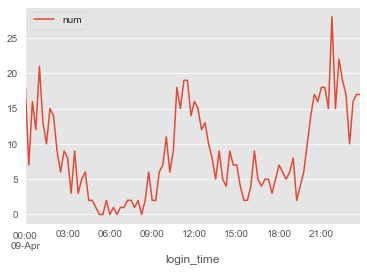

In [406]:
weeks=df4thu['week'].unique()
fig = py.figure()
num1=1
for i in weeks:
    ax=df4thu[df4thu['week']==i].plot(y='num',x='login_time')

<Figure size 432x288 with 0 Axes>

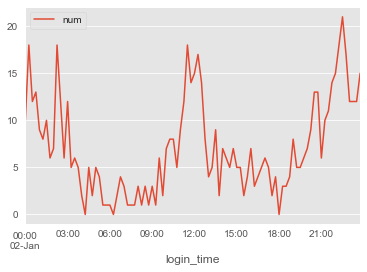

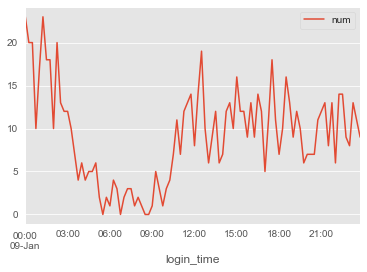

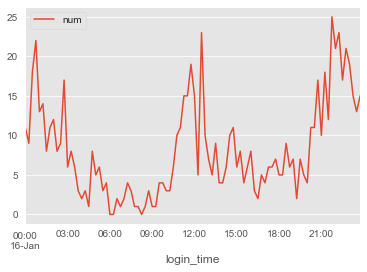

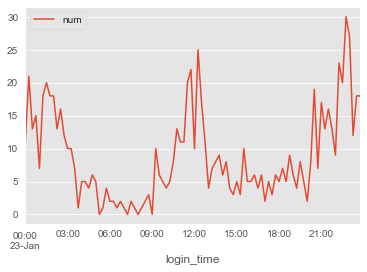

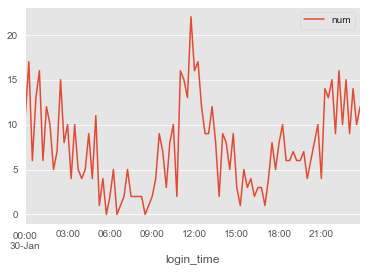

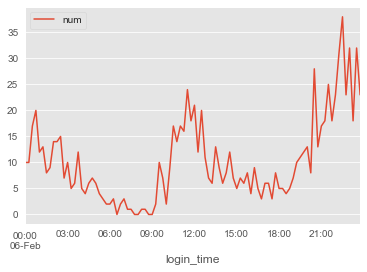

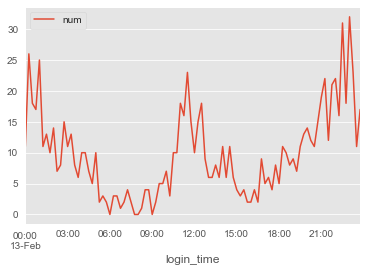

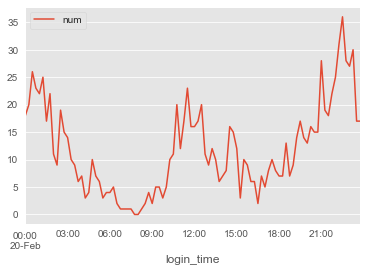

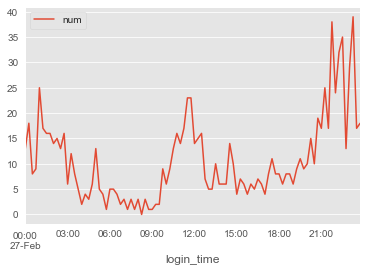

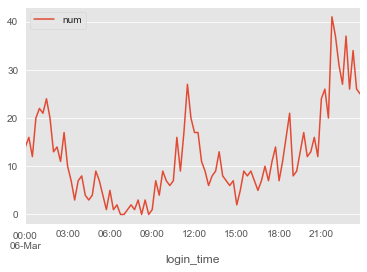

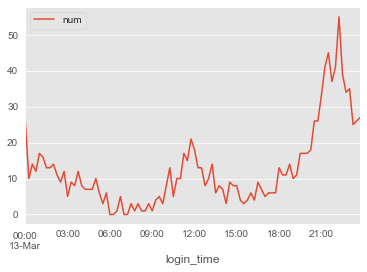

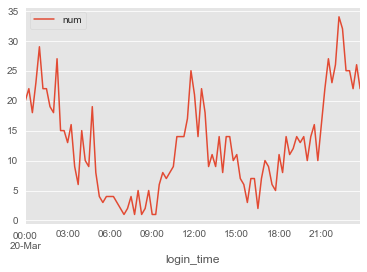

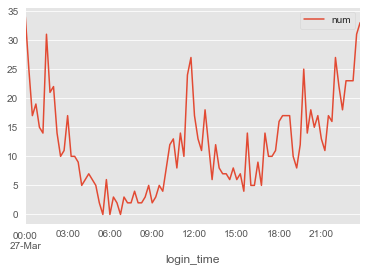

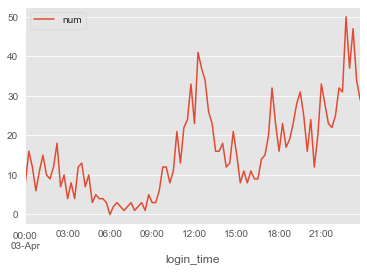

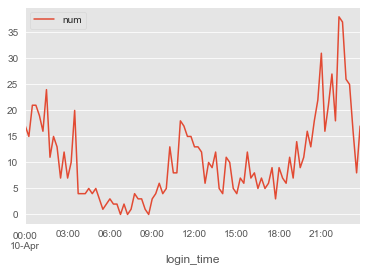

In [407]:
weeks=df4fri['week'].unique()
fig = py.figure()
num1=1
for i in weeks:
    ax=df4fri[df4fri['week']==i].plot(y='num',x='login_time')

<Figure size 432x288 with 0 Axes>

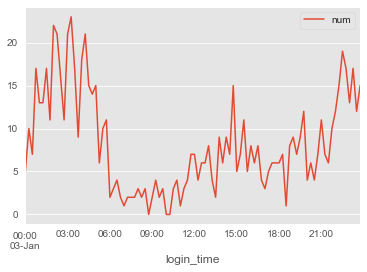

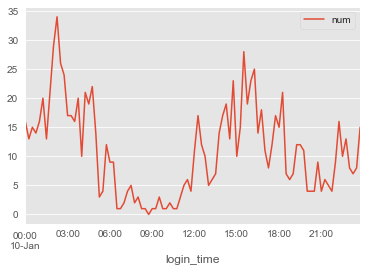

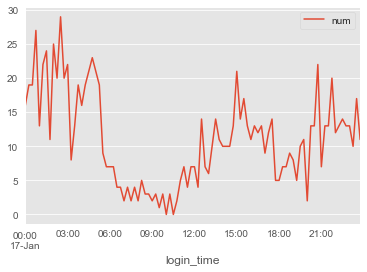

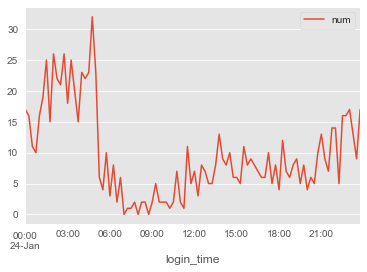

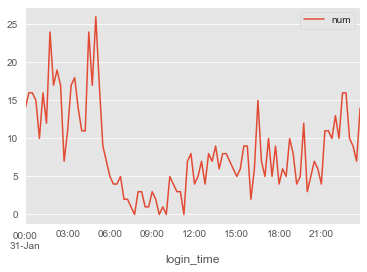

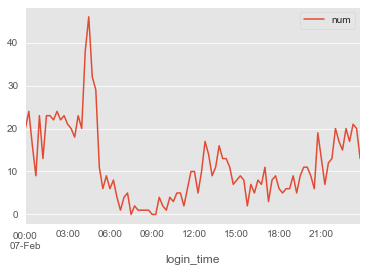

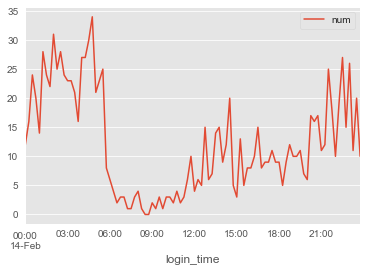

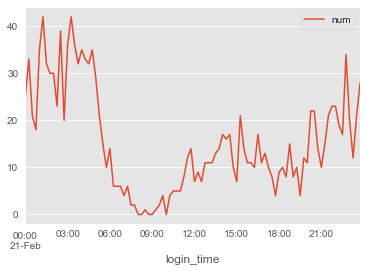

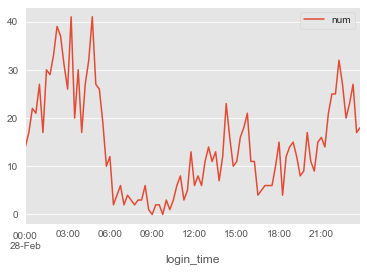

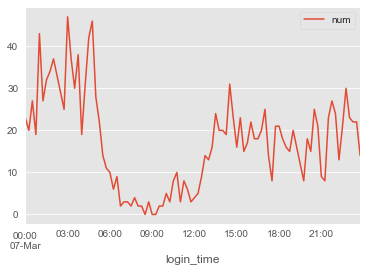

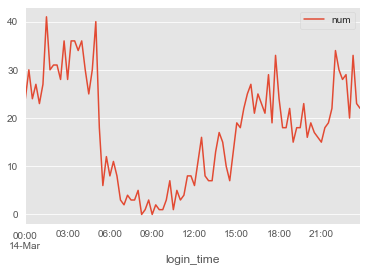

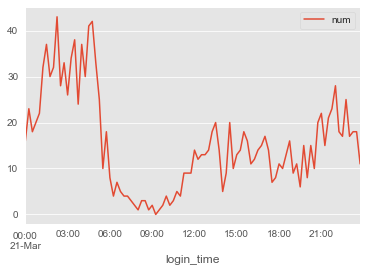

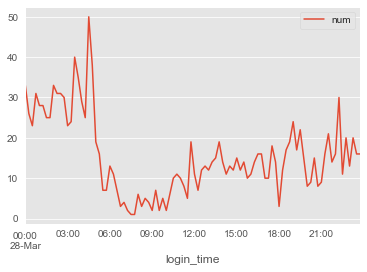

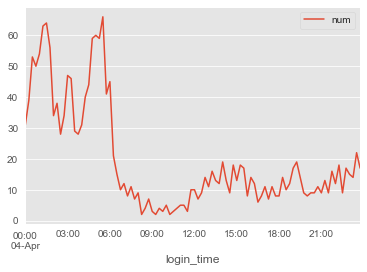

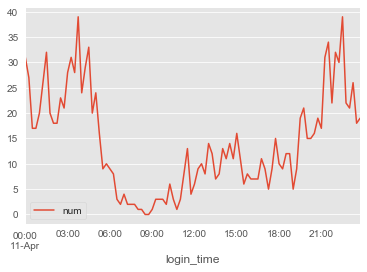

In [408]:
weeks=df4sat['week'].unique()
fig = py.figure()
num1=1
for i in weeks:
    ax=df4sat[df4sat['week']==i].plot(y='num',x='login_time')

<Figure size 432x288 with 0 Axes>

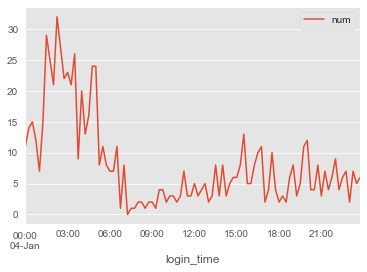

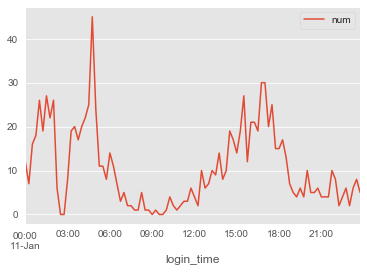

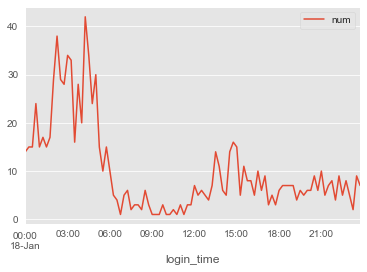

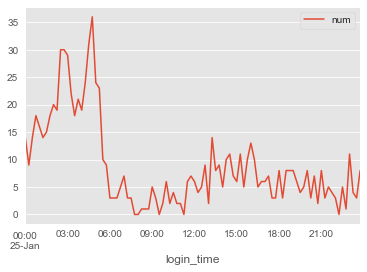

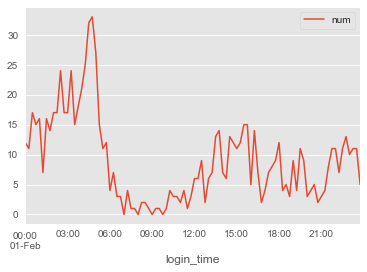

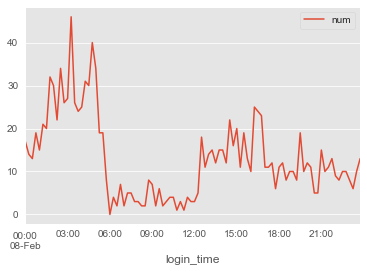

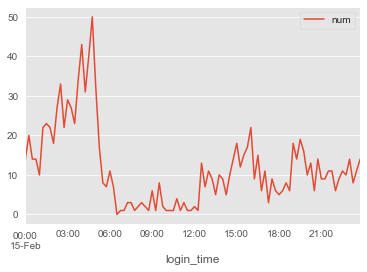

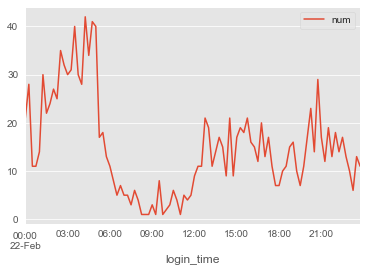

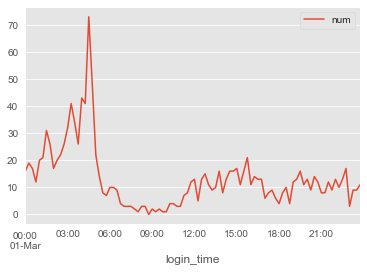

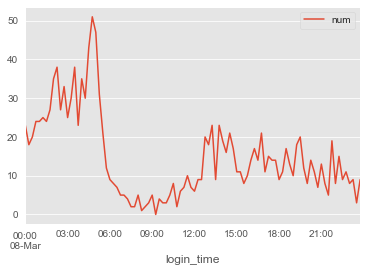

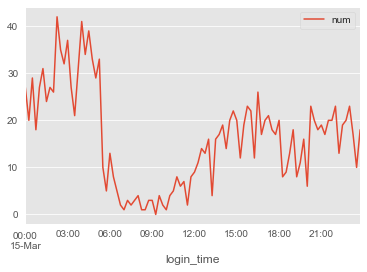

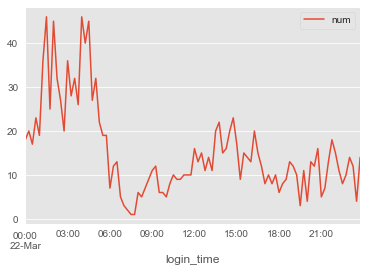

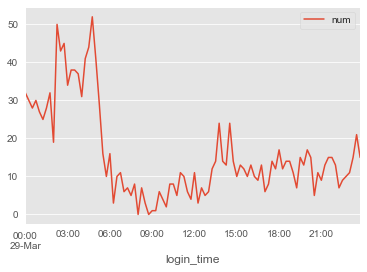

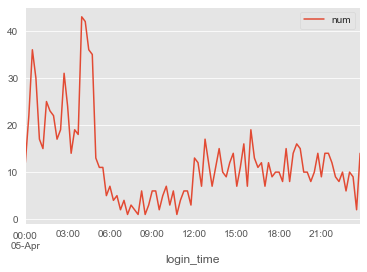

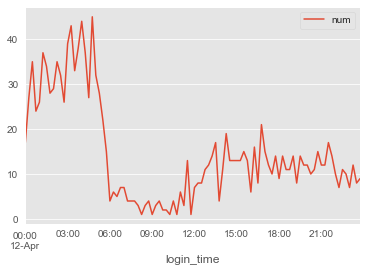

In [409]:
weeks=df4sun['week'].unique()
fig = py.figure()
num1=1
for i in weeks:
    ax=df4sun[df4sun['week']==i].plot(y='num',x='login_time')

Findings:

There are distinct patterns, during the weekly cycle and the daily cycle. 


Weekly Pattern:
Highest on Saturday. Second highest Sunday. Third highest Friday. Lowest on Monday and Tuesday.



Daily Pattern:
Monday-Thursday: Highest at noon. Lowest at 6 AM and PM. Second highest around midnight.
Saturday: Highest from midnight to 4 pm. Lowest at 6 AM and PM. Steadily rises thoroughout day.
Sunday: Highest at 2 am. Lowest at 8 am. Steady low rest of the time.

Data Integrity:
The year is 1970. Ridesharing tech didn't exist at the time so this is obviously wrong. With the correct year, we can also look at changes due to holidays etc. The day of the week is based on the date, in 1970. Since 1970 is wrong, our day of the week is also probably wrong.